In [2]:
import requests
import os
import json
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


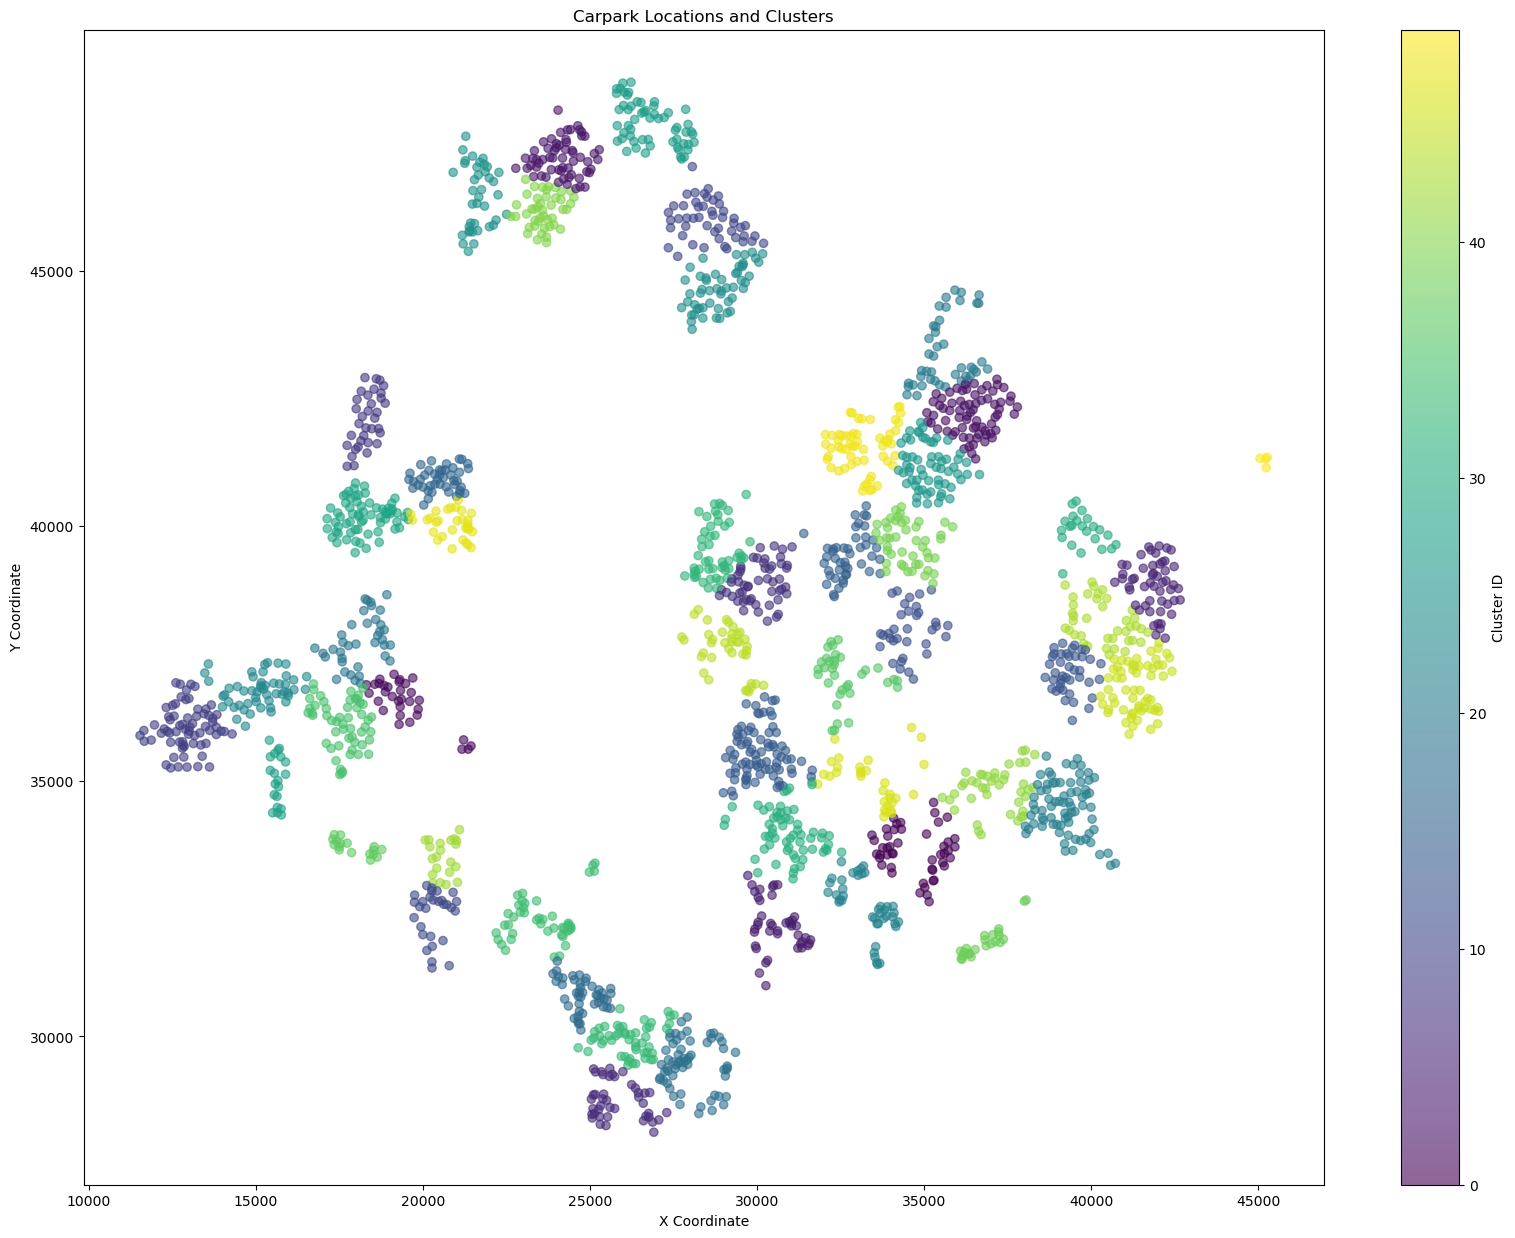

In [12]:
# Cluster carpark locations using KMeans
def cluster_carparks(coord_df, cluster_count=50):
    scaler = StandardScaler()
    coord_df[["x_coord_T", "y_coord_T"]] = scaler.fit_transform(coord_df[["x_coord", "y_coord"]])
    kmeans = KMeans(n_clusters=cluster_count, random_state=1)
    coord_df["kmeans"] = kmeans.fit_predict(coord_df[["x_coord_T", "y_coord_T"]])
    return coord_df

# Visualize carpark locations with clusters
def visualize_clusters(coord_df):
    plt.figure(figsize=(20, 15))
    plt.scatter(coord_df["x_coord"], coord_df["y_coord"], c=coord_df["kmeans"], cmap='viridis', alpha=0.6)
    plt.title('Carpark Locations and Clusters')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.colorbar(label='Cluster ID')
    plt.show()


# Load carpark location data
carpark_rates_dir = 'HDBCarparkInformation.csv'  # File in the same directory
coord_df = pd.read_csv(carpark_rates_dir)
coord_df = coord_df[["car_park_no", "x_coord", "y_coord"]]

# Cluster carparks and visualize
coord_df = cluster_carparks(coord_df)
visualize_clusters(coord_df)

In [3]:
import pandas as pd
from math import sqrt

def calculate_distance(x1, y1, x2, y2):
    return sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def get_nearest_parking(df, target_x, target_y, num_nearest=3):
    distances = []
    for _, row in df.iterrows():
        x = row['x_coord']
        y = row['y_coord']
        distance = calculate_distance(x, y, target_x, target_y)
        distances.append(distance)
    
    df['distance'] = distances

    nearest_parking = df.nsmallest(num_nearest, 'distance')

    nearest_parking_names = nearest_parking['car_park_no'].tolist()
    
    return nearest_parking, nearest_parking_names

df = pd.read_csv('merged_carpark_data.csv')
target_x = 26350 
target_y = 31717

nearest_parking, nearest_parking_names = get_nearest_parking(df, target_x, target_y)

print(nearest_parking[['car_park_no', 'x_coord', 'y_coord', 'distance']])
print("Nearest Parking Lots: ", nearest_parking_names)


     car_park_no     x_coord     y_coord     distance
1606        DWST  25626.2862  30840.6986  1136.514764
763          CLM  25894.5957  30541.7316  1260.416157
206         SAM2  25513.9562  30707.2765  1310.919823
Nearest Parking Lots:  ['DWST', 'CLM', 'SAM2']


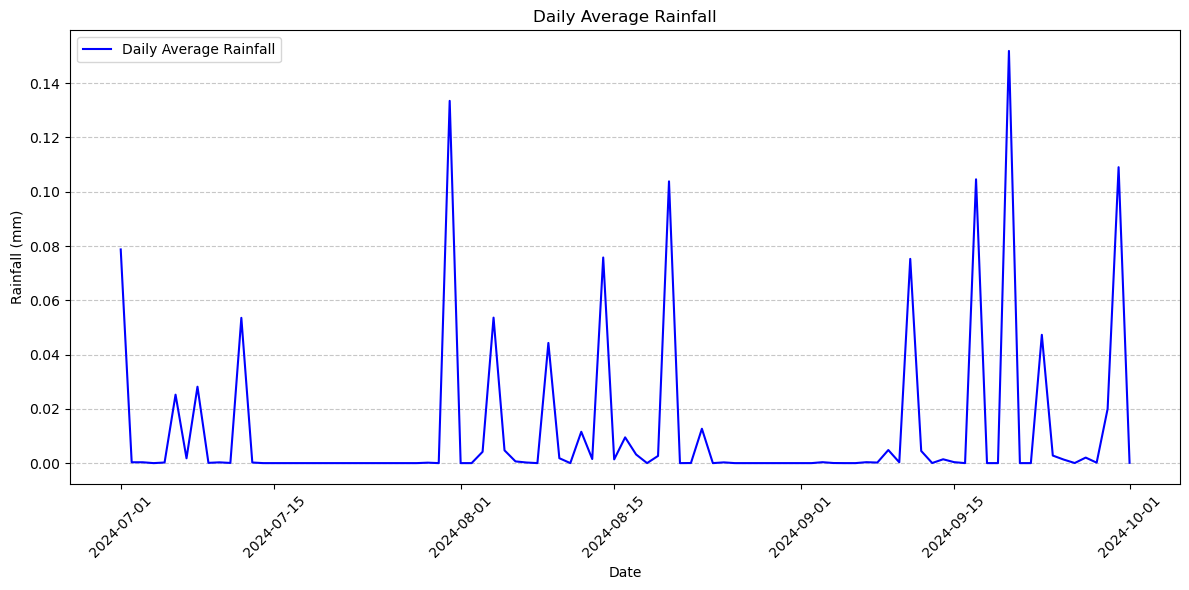

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_rainfall_data():
    base_url = "https://api-open.data.gov.sg/v2/real-time/api/rainfall"
    rainfall_data = []
    start_date = datetime(2024, 7, 1)
    end_date = datetime(2024, 10, 1)
    current_date = start_date

    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")  # 格式化日期为 YYYY-MM-DD
        response = requests.get(base_url, params={"date": date_str})
        
        if response.status_code == 200:
            data = response.json()
            if "data" in data and "readings" in data["data"]:
                readings = data["data"]["readings"]
                for reading in readings:
                    for station in reading.get("data", []):
                        rainfall_data.append({
                            "date": current_date,
                            "stationId": station["stationId"],
                            "rainfall": station["value"]
                        })
        else:
            print(f"Error fetching data for {current_date}: {response.status_code}")
        
        current_date += timedelta(days=1)

    return pd.DataFrame(rainfall_data)

df = fetch_rainfall_data()

df['date'] = pd.to_datetime(df['date'])

daily_average_rainfall = df.groupby('date')['rainfall'].mean()
csv_file_path = "daily_average_rainfall_2020.csv"
daily_average_rainfall.to_csv(csv_file_path, index=True, header=["Rainfall (mm)"])

plt.figure(figsize=(12, 6))
plt.plot(daily_average_rainfall.index, daily_average_rainfall.values, color='blue', label='Daily Average Rainfall')
plt.title('Daily Average Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


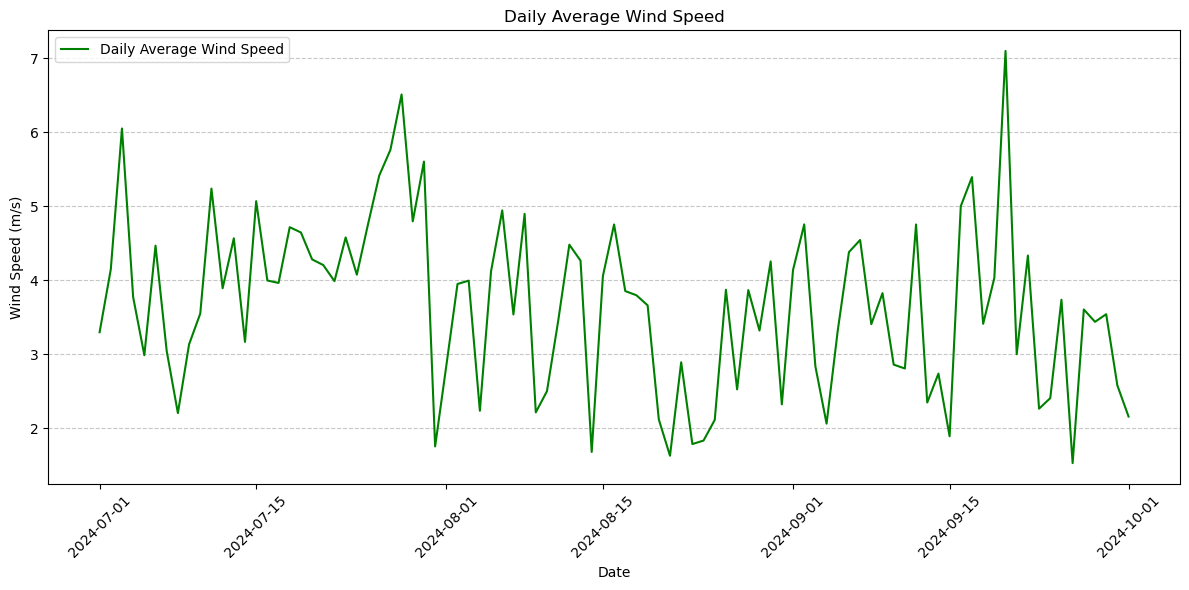

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to fetch wind speed data
def fetch_wind_speed_data():
    base_url = "https://api-open.data.gov.sg/v2/real-time/api/wind-speed"  # Assume this URL provides wind speed data
    wind_speed_data = []
    start_date = datetime(2024, 7, 1)
    end_date = datetime(2024, 10, 1)
    current_date = start_date

    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")  # Format the date as YYYY-MM-DD
        response = requests.get(base_url, params={"date": date_str})
        
        if response.status_code == 200:
            data = response.json()
            if "data" in data and "readings" in data["data"]:
                readings = data["data"]["readings"]
                for reading in readings:
                    for station in reading.get("data", []):
                        wind_speed_data.append({
                            "date": current_date,
                            "stationId": station["stationId"],
                            "windSpeed": station["value"]  # Assume "value" stores the wind speed data
                        })
        else:
            print(f"Error fetching data for {current_date}: {response.status_code}")
        
        # Increment by one day
        current_date += timedelta(days=1)

    return pd.DataFrame(wind_speed_data)

# Fetch data
df = fetch_wind_speed_data()

# Data processing
df['date'] = pd.to_datetime(df['date'])

# Calculate the daily average wind speed
daily_average_wind_speed = df.groupby('date')['windSpeed'].mean()
csv_file_path = "wind_speed.csv"
daily_average_wind_speed.to_csv(csv_file_path, index=True, header=["Wind Speed (m/s)"])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(daily_average_wind_speed.index, daily_average_wind_speed.values, color='green', label='Daily Average Wind Speed')
plt.title('Daily Average Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


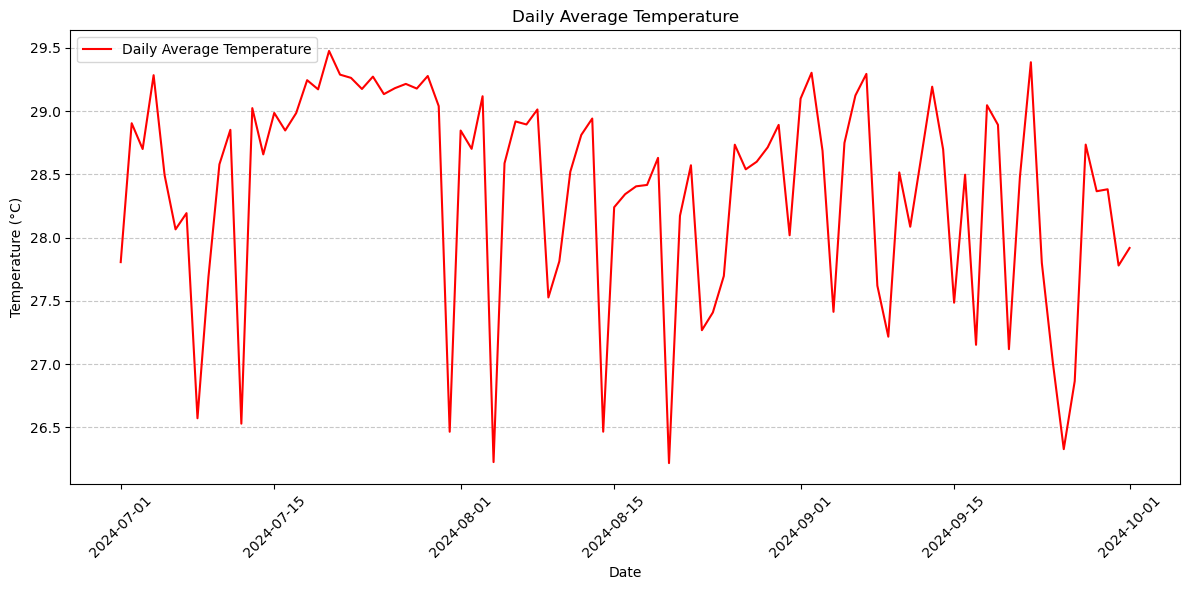

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to fetch temperature data
def fetch_temperature_data():
    base_url = "https://api-open.data.gov.sg/v2/real-time/api/air-temperature"  # Assume this URL provides temperature data
    temperature_data = []
    start_date = datetime(2024, 7, 1)
    end_date = datetime(2024, 10, 1)
    current_date = start_date

    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")  # Format the date as YYYY-MM-DD
        response = requests.get(base_url, params={"date": date_str})
        
        if response.status_code == 200:
            data = response.json()
            if "data" in data and "readings" in data["data"]:
                readings = data["data"]["readings"]
                for reading in readings:
                    for station in reading.get("data", []):
                        temperature_data.append({
                            "date": current_date,
                            "stationId": station["stationId"],
                            "temperature": station["value"]  # Assume "value" stores the temperature data
                        })
        else:
            print(f"Error fetching data for {current_date}: {response.status_code}")
        
        # Increment by one day
        current_date += timedelta(days=1)

    return pd.DataFrame(temperature_data)

# Fetch data
df = fetch_temperature_data()

# Data processing
df['date'] = pd.to_datetime(df['date'])

# Calculate the daily average temperature
daily_average_temperature = df.groupby('date')['temperature'].mean()
csv_file_path = "temperature.csv"
daily_average_temperature.to_csv(csv_file_path, index=True, header=["Temperature (°C)"])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(daily_average_temperature.index, daily_average_temperature.values, color='red', label='Daily Average Temperature')
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


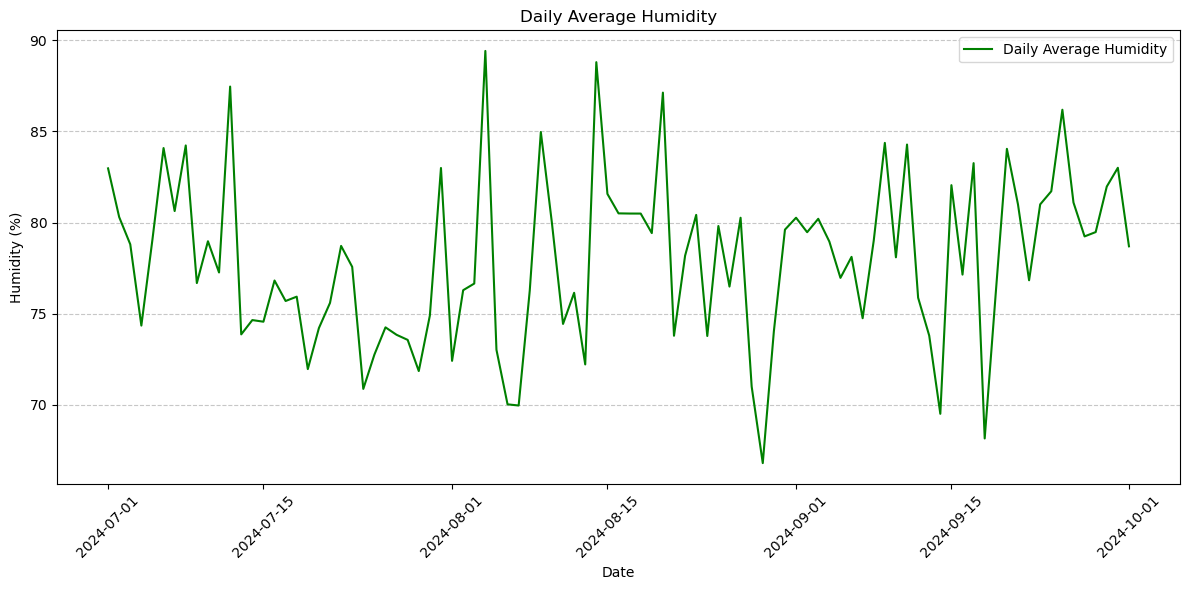

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to fetch relative humidity data
def fetch_humidity_data():
    base_url = "https://api-open.data.gov.sg/v2/real-time/api/relative-humidity"  # Assume this URL provides humidity data
    humidity_data = []
    start_date = datetime(2024, 7, 1)
    end_date = datetime(2024, 10, 1)
    current_date = start_date

    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")  # Format the date as YYYY-MM-DD
        response = requests.get(base_url, params={"date": date_str})
        
        if response.status_code == 200:
            data = response.json()
            if "data" in data and "readings" in data["data"]:
                readings = data["data"]["readings"]
                for reading in readings:
                    for station in reading.get("data", []):
                        humidity_data.append({
                            "date": current_date,
                            "stationId": station["stationId"],
                            "humidity": station["value"]  # Assume "value" stores the humidity data
                        })
        else:
            print(f"Error fetching data for {current_date}: {response.status_code}")
        
        # Increment by one day
        current_date += timedelta(days=1)

    return pd.DataFrame(humidity_data)

# Fetch data
df = fetch_humidity_data()

# Data processing
df['date'] = pd.to_datetime(df['date'])

# Calculate the daily average humidity
daily_average_humidity = df.groupby('date')['humidity'].mean()
csv_file_path = "humidity.csv"
daily_average_humidity.to_csv(csv_file_path, index=True, header=["Humidity (%)"])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(daily_average_humidity.index, daily_average_humidity.values, color='green', label='Daily Average Humidity')
plt.title('Daily Average Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def fetch_carpark_availability(target_carpark_id, start_date=datetime(2024, 7, 1), end_date=datetime(2024, 10, 1), interval=6):
    """
    Fetches the available parking lot data for a specified car park within a given date range and saves it as a CSV file.
    
    :param target_carpark_id: The car park ID to query (e.g., "HLM")
    :param start_date: The start date for the data query
    :param end_date: The end date for the data query
    :param interval: The time interval for reading data, in hours
    """
    # Initialize the results list
    results = []
    
    # Loop through each day
    current_date = start_date
    while current_date <= end_date:
        daily_lots = []
        for hour in range(0, 24, interval):
            # Construct the API URL
            timestamp = current_date.replace(hour=hour, minute=30, second=0)
            site = f"https://api.data.gov.sg/v1/transport/carpark-availability?date_time={timestamp.strftime('%Y-%m-%dT%H:%M:%S')}"
            #print(f"Fetching data for {timestamp}...")
            
            try:
                # Fetch API data
                response_API = requests.get(site)
                data = response_API.json()
                
                # Check if data exists
                if "items" not in data or not data["items"]:
                    print(f"No data available for {timestamp}")
                    continue

                # Extract car park data
                carpark_data = data["items"][0].get("carpark_data", [])
                
                # Find the target car park data
                for carpark in carpark_data:
                    if carpark["carpark_number"] == target_carpark_id:  # Compare the car park ID
                        for info in carpark["carpark_info"]:
                            # Convert to integer and skip invalid values
                            try:
                                daily_lots.append(int(info["lots_available"]))
                            except ValueError:
                                print(f"Invalid data at {timestamp}: {info['lots_available']}")
                                continue
            except Exception as e:
                print(f"Error fetching data for {timestamp}: {e}")
                continue
        
        # Calculate the daily average available lots
        if daily_lots:
            avg_lots_available = sum(daily_lots) / len(daily_lots)
        else:
            avg_lots_available = None  # Mark as None if data is missing
        
        # Record the results for the day
        results.append({"date": current_date.strftime('%Y-%m-%d'), "avg_lots_available": avg_lots_available})
        
        # Move to the next day
        current_date += timedelta(days=1)

    # Convert results to DataFrame
    df_results = pd.DataFrame(results)

    # Save to CSV file, including target_carpark_id in the filename
    output_file = f"{target_carpark_id}_carpark_availability.csv"
    df_results.to_csv(output_file, index=False)

    print(f"Data saved to {output_file}")


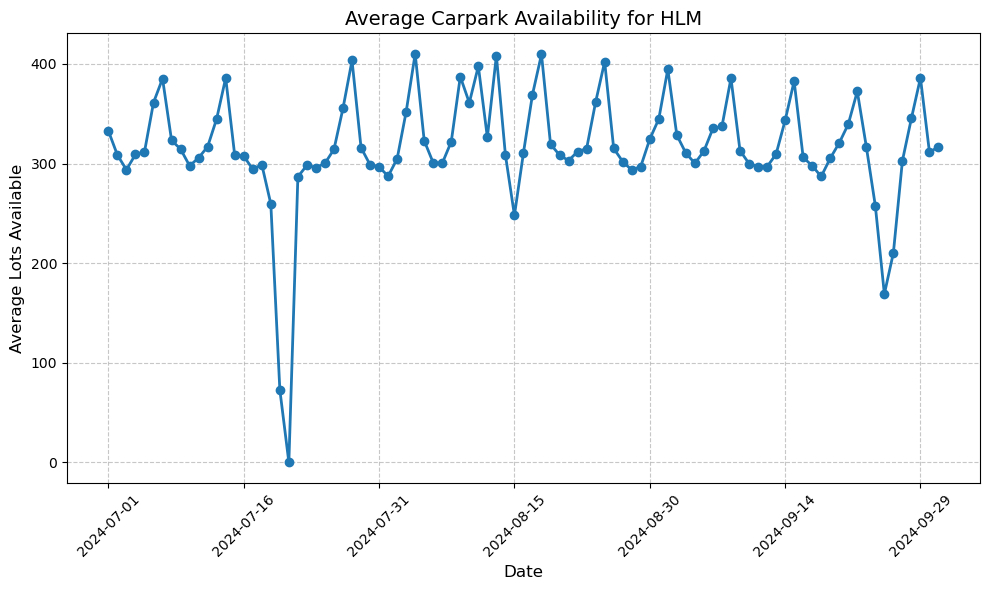

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_carpark_availability_from_csv(csv_file, target_carpark_id):
    """
    Reads car park availability data from a CSV file and plots the average availability over time.
    
    :param csv_file: The path to the CSV file containing the data
    :param target_carpark_id: The car park ID (used for the title of the plot)
    """
    # Load the CSV file into a DataFrame
    df_results = pd.read_csv(csv_file)
    
    # Convert the 'date' column to datetime for proper handling
    df_results['date'] = pd.to_datetime(df_results['date'])
    
    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.plot(df_results['date'], df_results['avg_lots_available'], marker='o', linestyle='-', linewidth=2)

    # Set the title and labels
    plt.title(f'Average Carpark Availability for {target_carpark_id}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Lots Available', fontsize=12)

    # Customize the grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adjust x-axis ticks to display every 15 days
    tick_indices = range(0, len(df_results), 15)  # Skip 15 days
    plt.xticks(df_results['date'].iloc[tick_indices], rotation=45, fontsize=10)

    # Layout and display
    plt.tight_layout()
    plt.show()


# Example function call
csv_file = "HLM_carpark_availability.csv"  # Replace with your CSV file path
plot_carpark_availability_from_csv(csv_file, "HLM")


In [ ]:
fetch_carpark_availability(nearest_parking_names[0], start_date=datetime(2024, 7, 1), end_date=datetime(2024, 10, 1))

No data available for 2024-07-30 06:30:00
No data available for 2024-08-25 00:30:00


In [ ]:
fetch_carpark_availability(nearest_parking_names[1], start_date=datetime(2024, 7, 1), end_date=datetime(2024, 10, 1))

In [16]:
fetch_carpark_availability(nearest_parking_names[2], start_date=datetime(2024, 7, 1), end_date=datetime(2024, 10, 1))

No data available for 2024-07-09 18:30:00
Data saved to SAM2_carpark_availability.csv


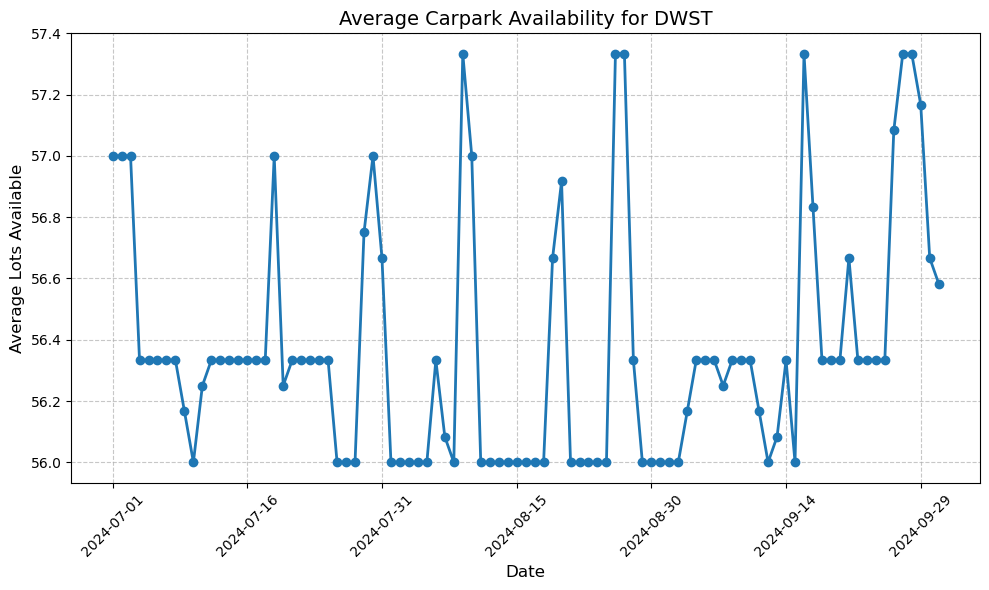

In [7]:
csv_file = "DWST_carpark_availability.csv"  
plot_carpark_availability_from_csv(csv_file, "DWST")

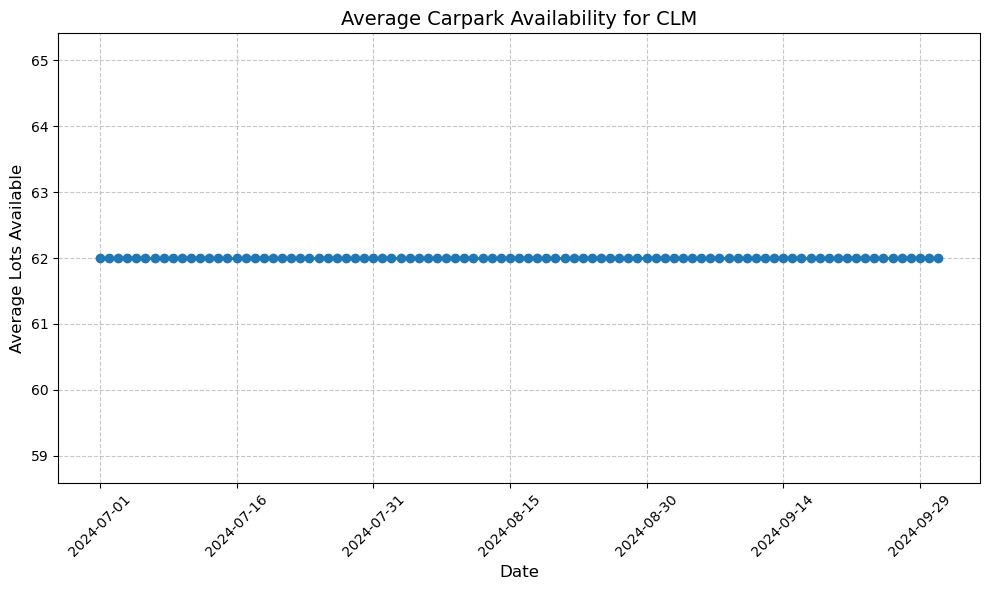

In [8]:
csv_file = "CLM_carpark_availability.csv"  
plot_carpark_availability_from_csv(csv_file, "CLM")

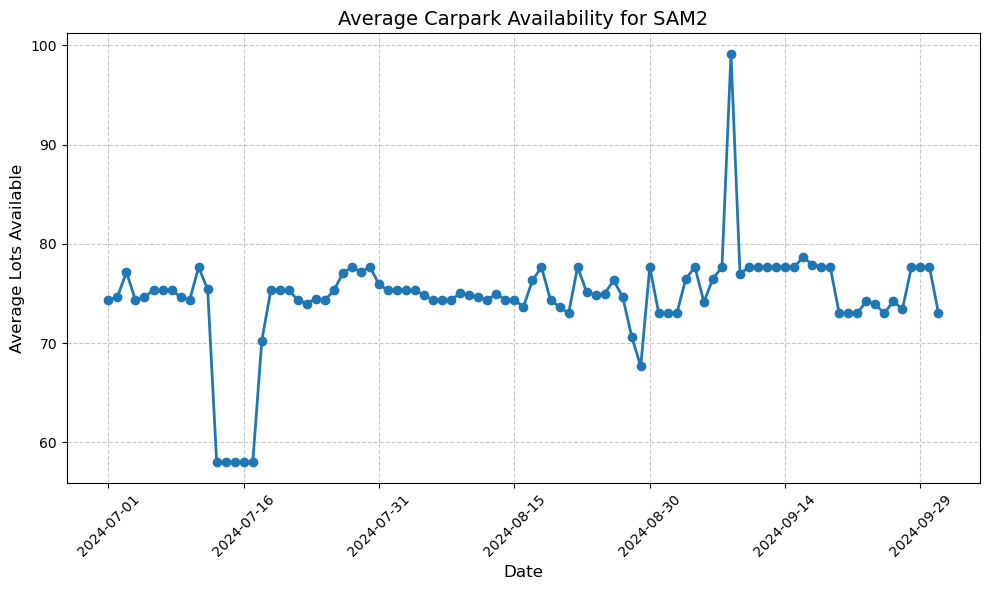

In [9]:
csv_file = "SAM2_carpark_availability.csv"  
plot_carpark_availability_from_csv(csv_file, "SAM2")

DWST
Mean Squared Error: 0.21808713450292783
R² Score: -0.17433619225194041


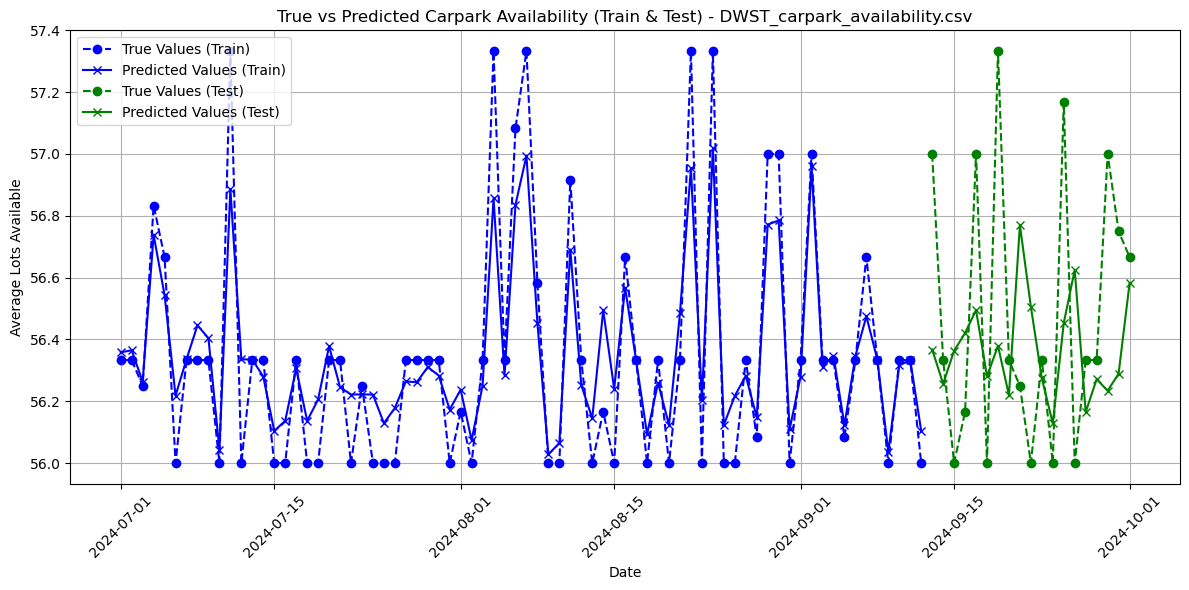

CLM
Parking lot CLM_carpark_availability.csv is marked as inactive due to lack of variability in carpark availability.
Mean Squared Error: 0.0
R² Score: 1.0


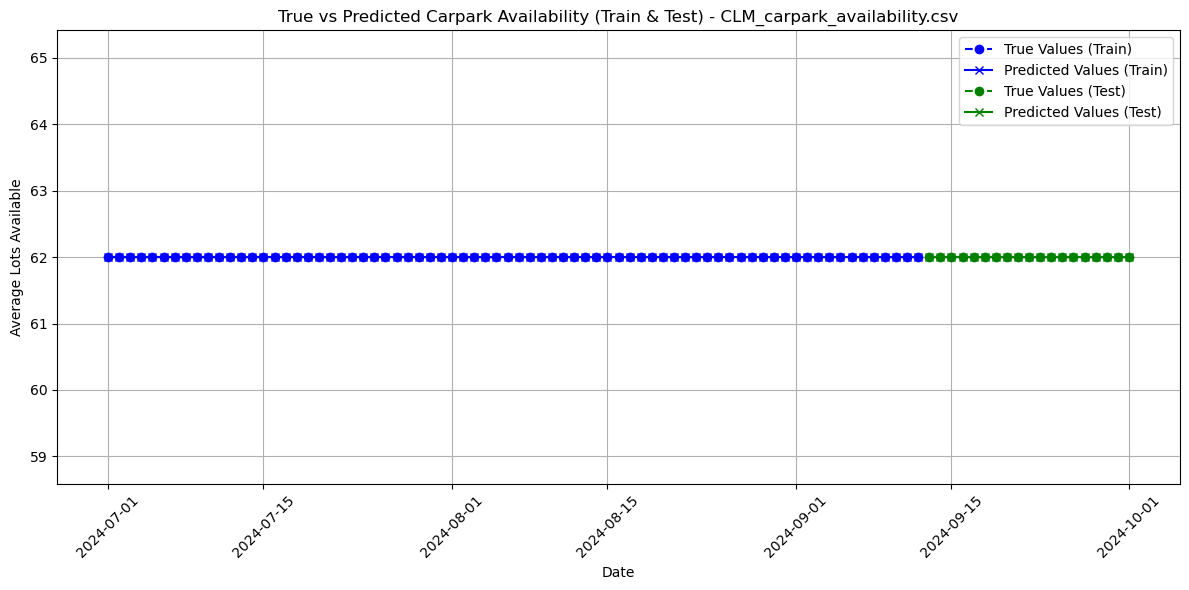

Note: The parking lot CLM_carpark_availability.csv is inactive due to minimal variability in carpark availability.
Predictions for this carpark are still made, but it is marked as inactive.
SAM2
Mean Squared Error: 23.005236622807075
R² Score: -0.3390155215077031


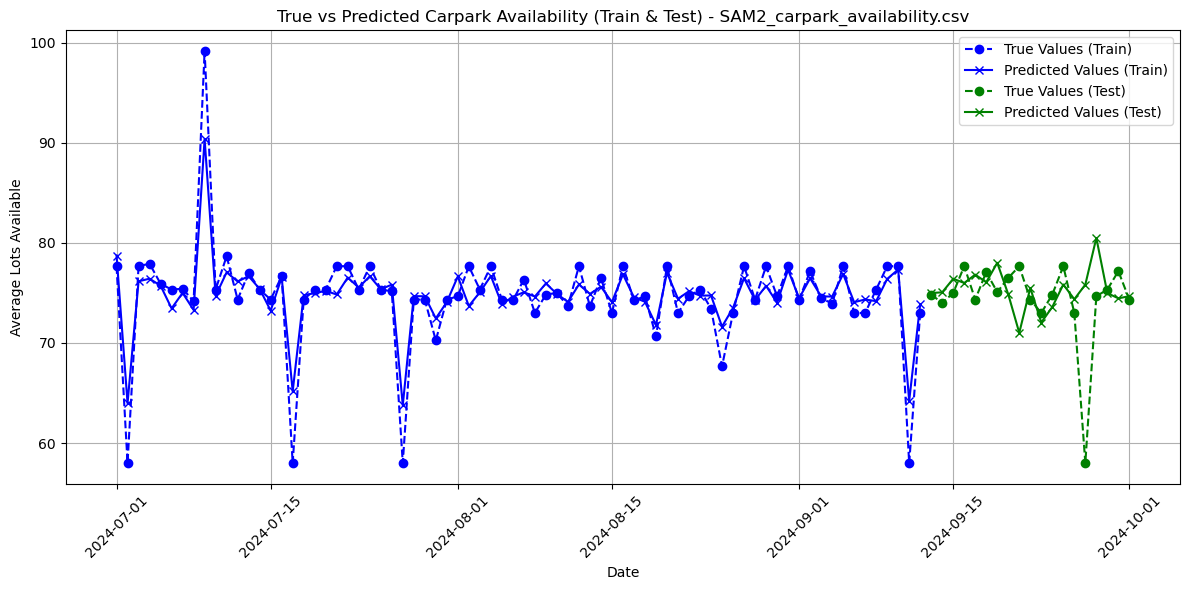

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib  # For saving the model

def check_inactive_carpark(carpark_df, threshold=0.01):
    """
    Check if the parking lot is inactive by evaluating if the change in the 
    average lot availability is too small (low variance).
    
    :param carpark_df: DataFrame containing carpark availability data
    :param threshold: Threshold for variance to consider a parking lot as inactive
    :return: True if the parking lot is inactive, False otherwise
    """
    variance = carpark_df['avg_lots_available'].var()  # Calculate variance
    return variance < threshold

def train_and_predict_carpark_availability(wind_speed_file, temperature_file, humidity_file, carpark_file, model_file, test_size=0.2, random_state=42):
    """
    Train a random forest model to predict carpark availability and plot true vs predicted values for training and test sets.
    
    :param wind_speed_file: CSV file path containing wind speed data
    :param temperature_file: CSV file path containing temperature data
    :param humidity_file: CSV file path containing humidity data
    :param carpark_file: CSV file path containing carpark availability data
    :param model_file: Path to save the trained model
    :param test_size: The proportion of the data to be used for testing (default is 0.2, i.e., 80% training, 20% testing)
    :param random_state: Random seed (for reproducibility of data split and model training)
    """
    # Load the data
    wind_speed_df = pd.read_csv(wind_speed_file)
    temperature_df = pd.read_csv(temperature_file)
    humidity_df = pd.read_csv(humidity_file)
    carpark_df = pd.read_csv(carpark_file)

    # Check if parking lot is inactive
    if check_inactive_carpark(carpark_df):
        print(f"Parking lot {carpark_file} is marked as inactive due to lack of variability in carpark availability.")
        inactive_status = True
    else:
        inactive_status = False

    # Merge weather data
    df = wind_speed_df.merge(temperature_df, on="date", how="inner")
    df = df.merge(humidity_df, on="date", how="inner")

    # Merge carpark data
    df = df.merge(carpark_df[['date', 'avg_lots_available']], on="date", how="inner")

    # Data preprocessing
    df['date'] = pd.to_datetime(df['date'])

    # Features and target variable
    X = df[['Wind Speed (m/s)', 'Temperature (°C)', 'Humidity (%)']]
    y = df['avg_lots_available']

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)

    # Predict on the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")

    # Visualize the predictions
    plt.figure(figsize=(12, 6))

    # Plot training set predictions
    plt.plot(df['date'][:len(y_train)], y_train, label='True Values (Train)', marker='o', linestyle='--', color='blue')
    plt.plot(df['date'][:len(y_train)], y_train_pred, label='Predicted Values (Train)', marker='x', linestyle='-', color='blue')

    # Plot test set predictions
    plt.plot(df['date'][len(y_train):], y_test, label='True Values (Test)', marker='o', linestyle='--', color='green')
    plt.plot(df['date'][len(y_train):], y_test_pred, label='Predicted Values (Test)', marker='x', linestyle='-', color='green')

    plt.title(f'True vs Predicted Carpark Availability (Train & Test) - {carpark_file}')
    plt.xlabel('Date')
    plt.ylabel('Average Lots Available')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Save the trained model
    joblib.dump(model, model_file)  # Save the model

    # If the carpark is inactive, print a message but still save the predictions
    if inactive_status:
        print(f"Note: The parking lot {carpark_file} is inactive due to minimal variability in carpark availability.")
        print("Predictions for this carpark are still made, but it is marked as inactive.")

# Example function call for a parking lot
for parks in nearest_parking_names:
    print(parks)
    train_and_predict_carpark_availability(
        wind_speed_file="wind_speed.csv",
        temperature_file="temperature.csv",
        humidity_file="humidity.csv",
        carpark_file=f"{parks}_carpark_availability.csv",
        model_file=f"{parks}_carpark_model.pkl",  # Saved model file name
        test_size=0.2,
        random_state=42
    )


In [16]:
import joblib
import requests
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Weather forecast function
def fetch_weather_forecast():
    """
    Fetch the weather forecast from the API and extract the average weather information for the next day.
    """
    url = "https://api.data.gov.sg/v1/environment/4-day-weather-forecast"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Get the current date
        today_date = datetime.now().strftime("%Y-%m-%d")
        
        # Find the first weather forecast for the day after today
        next_day_forecast = None
        for forecast in data["items"][0]["forecasts"]:
            if forecast["date"] > today_date:
                next_day_forecast = forecast
                break
        
        if not next_day_forecast:
            print("No forecast available for the next day.")
            return None
        
        # Extract relevant fields
        temperature = next_day_forecast["temperature"]  # Contains low and high temperatures
        wind_speed = next_day_forecast["wind"]["speed"]  # Wind speed range
        humidity = next_day_forecast["relative_humidity"]  # Humidity range
        
        # Calculate averages
        avg_temperature = (temperature["low"] + temperature["high"]) / 2
        avg_wind_speed = (wind_speed["low"] + wind_speed["high"]) / 2 / 3.6  # Convert to m/s
        avg_humidity = (humidity["low"] + humidity["high"]) / 2

        print(f"Next Day ({next_day_forecast['date']}) Weather Forecast:")
        print(f"- Temperature: {avg_temperature}°C (Avg)")
        print(f"- Wind Speed: {avg_wind_speed:.2f} m/s (Avg)")
        print(f"- Humidity: {avg_humidity}% (Avg)")
        
        return {
            "avg_temperature": avg_temperature,
            "avg_wind_speed": avg_wind_speed,
            "avg_humidity": avg_humidity
        }
    else:
        print("Failed to retrieve weather data.")
        return None

# Carpark availability prediction function
def predict_next_day_carpark_availability(model_file, weather_data, is_inactive=False):
    """
    Predict the number of available carpark lots for the next day using a pre-trained model.
    
    :param model_file: Path to the model file
    :param weather_data: A dictionary containing weather data (wind speed, temperature, humidity)
    :param is_inactive: A flag indicating whether the carpark is inactive (default: False)
    """
    try:
        # Load the model
        model = joblib.load(model_file)
        
        # Construct input features
        X = [[
            weather_data["avg_wind_speed"],
            weather_data["avg_temperature"],
            weather_data["avg_humidity"]
        ]]
        
        # Make prediction
        predicted_lots = model.predict(X)
        if is_inactive:
            print(f"{model_file} parking lot is marked as inactive. Predicted Available Lots: {predicted_lots[0]:.2f} (Inactive)")
        else:
            print(f"{model_file} parking lot is active. Predicted Available Lots: {predicted_lots[0]:.2f}")
        return predicted_lots[0]
    
    except FileNotFoundError:
        print(f"Model file not found: {model_file}")
        return None  # In case of file error

Next Day (2024-11-19) Weather Forecast:
- Temperature: 27.5°C (Avg)
- Wind Speed: 3.47 m/s (Avg)
- Humidity: 80.0% (Avg)
DWST_carpark_model.pkl parking lot is active. Predicted Available Lots: 56.59
CLM_carpark_model.pkl parking lot is marked as inactive. Predicted Available Lots: 62.00 (Inactive)
SAM2_carpark_model.pkl parking lot is active. Predicted Available Lots: 74.33

Parking lot with the most available lots: SAM2 (74.33 lots available)


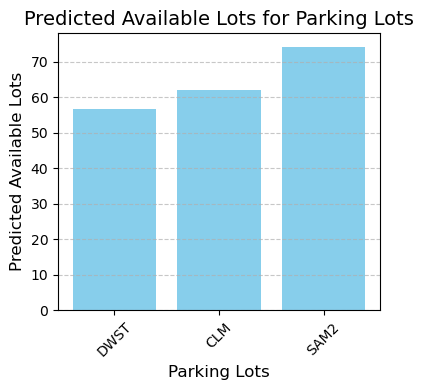

In [21]:

# Main function
def main():
    """
    Main function to fetch the weather forecast and predict carpark availability
    for the nearest parking lots. Displays the lot with the highest availability
    and plots a bar chart of predictions.
    """
    # Fetch the next day's weather forecast
    weather_data = fetch_weather_forecast()
    if not weather_data:
        print("Unable to fetch weather data for prediction.")
        return

    # Example list of nearest parking lots with their inactive status
    nearest_parking_names = ['DWST', 'CLM', 'SAM2']
    parking_inactive_status = {
        'DWST': False,   # Example: DWST is inactive
        'CLM': True,   # CLM is active
        'SAM2': False   # SAM2 is active
    }

    # Dictionary to store parking lot predictions
    parking_predictions = {}

    # Iterate through the nearest parking lots and predict availability
    for parks in nearest_parking_names:
        model_file = f"{parks}_carpark_model.pkl"  # Corresponding model file
        
        # Check if parking lot is inactive
        is_inactive = parking_inactive_status.get(parks, False)  # Check if parking lot is inactive
        
        # Predict availability for active parking lots and output result for inactive ones
        predicted_lots = predict_next_day_carpark_availability(model_file, weather_data, is_inactive)
        if predicted_lots is not None:
            parking_predictions[parks] = predicted_lots

    # Find the parking lot with the most available lots
    if parking_predictions:
        best_parking = max(parking_predictions, key=parking_predictions.get)
        print(f"\nParking lot with the most available lots: {best_parking} "
              f"({parking_predictions[best_parking]:.2f} lots available)")

        # Plot the predictions
        plt.figure(figsize=(4, 4))
        plt.bar(parking_predictions.keys(), parking_predictions.values(), color='skyblue')
        plt.title('Predicted Available Lots for Parking Lots', fontsize=14)
        plt.xlabel('Parking Lots', fontsize=12)
        plt.ylabel('Predicted Available Lots', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo valid predictions available.")

# Run the main program
if __name__ == "__main__":
    main()
